In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sn
import pandas as pd
import copy

In [2]:
with open("../data/agreement_results.pickle", "rb") as f:
    data = pickle.load(f)

In [4]:
data.keys()

dict_keys(['obj_rel_across_anim.pickle', 'obj_rel_within_anim.pickle', 'obj_rel_no_comp_within_anim.pickle', 'obj_rel_no_comp_across_inanim.pickle', 'obj_rel_no_comp_across_anim.pickle', 'subj_rel.pickle', 'obj_rel_across_inanim.pickle', 'simple_agrmt.pickle', 'obj_rel_no_comp_within_inanim.pickle', 'sent_comp.pickle'])

In [6]:
relevant = [k for k in data.keys() if "within" not in k]

In [7]:
relevant

['obj_rel_across_anim.pickle',
 'obj_rel_no_comp_across_inanim.pickle',
 'obj_rel_no_comp_across_anim.pickle',
 'subj_rel.pickle',
 'obj_rel_across_inanim.pickle',
 'simple_agrmt.pickle',
 'sent_comp.pickle']

In [10]:
for k in copy.deepcopy(data):
    if k not in relevant:
        del data[k]

In [80]:
data.keys()

dict_keys(['obj_rel_across_anim.pickle', 'obj_rel_no_comp_across_inanim.pickle', 'obj_rel_no_comp_across_anim.pickle', 'subj_rel.pickle', 'obj_rel_across_inanim.pickle', 'simple_agrmt.pickle', 'sent_comp.pickle'])

In [106]:
sims = np.zeros((len(data.keys()), 5))
print(sims.shape)
agrt_type2ind = {d:i for i,d in enumerate(data.keys())}
agrt_ind2type = {i:d for d,i in agrt_type2ind.items()}

rc_type2ind = {d:i for i,d in enumerate(data["obj_rel_across_anim.pickle"].keys())}
rc_ind2type = {i:d for d,i in rc_type2ind.items()}

print(len(rc_ind2type), len(agrt_type2ind))
print(rc_ind2type)
print(agrt_ind2type)

(7, 5)
5 7
{0: 'src', 1: 'orc', 2: 'orrc', 3: 'prc', 4: 'prrc'}
{0: 'obj_rel_across_anim.pickle', 1: 'obj_rel_no_comp_across_inanim.pickle', 2: 'obj_rel_no_comp_across_anim.pickle', 3: 'subj_rel.pickle', 4: 'obj_rel_across_inanim.pickle', 5: 'simple_agrmt.pickle', 6: 'sent_comp.pickle'}


In [107]:
for agreement_type in data.keys():
    for rc_type in data[agreement_type].keys():
        sims[agrt_type2ind[agreement_type], rc_type2ind[rc_type]] = data[agreement_type][rc_type]["acc_after"]

In [108]:
labels_rows = [agrt_ind2type[i].split(".")[0] for i in range(len(agrt_ind2type))]
labels_columns = [rc_ind2type[i] for i in range(len(rc_ind2type))]

print(labels_rows)
print(labels_columns)

['obj_rel_across_anim', 'obj_rel_no_comp_across_inanim', 'obj_rel_no_comp_across_anim', 'subj_rel', 'obj_rel_across_inanim', 'simple_agrmt', 'sent_comp']
['src', 'orc', 'orrc', 'prc', 'prrc']


In [113]:
def plot(labels_rows, labels_columns, results, layer, classifier,iters):

    df_cm = pd.DataFrame(results, index = labels_rows,
                  columns = labels_columns)
    fig = plt.figure(figsize = (10,10))
    ax = sn.heatmap(df_cm, annot=True)
    #fig.set_size_inches(17, 4)
    plt.title("agreement accuracy (rows) as a function of INLP-RC-type (columns). Layer: {}. classifier: {}. {}\n (Lower values indicate greater influence of INLP)".format(layer, classifier, iters))
    #plt.show()
    ax.figure.axes[-1].yaxis.label.set_size(50)
    plt.savefig("../results/plots/agreement-interaction:{}.classifier:{}.{}.png".format(layer, classifier, iters), dpi=800)    
    plt.show()

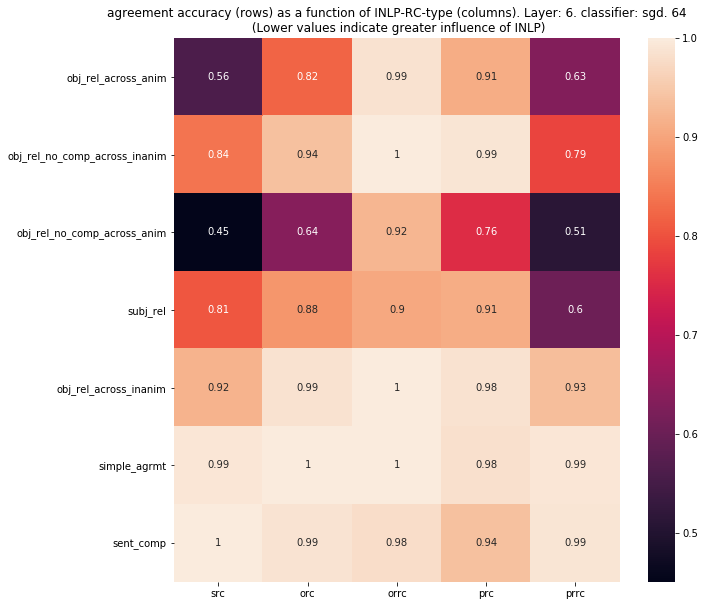

In [114]:
plot(labels_rows, labels_columns, sims, "6", "sgd", "64")